In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_data=pd.read_csv('/content/creditcard.csv')
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
credit_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
legit=credit_data[credit_data.Class==0]
fraud=credit_data[credit_data.Class==1]

In [7]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [8]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


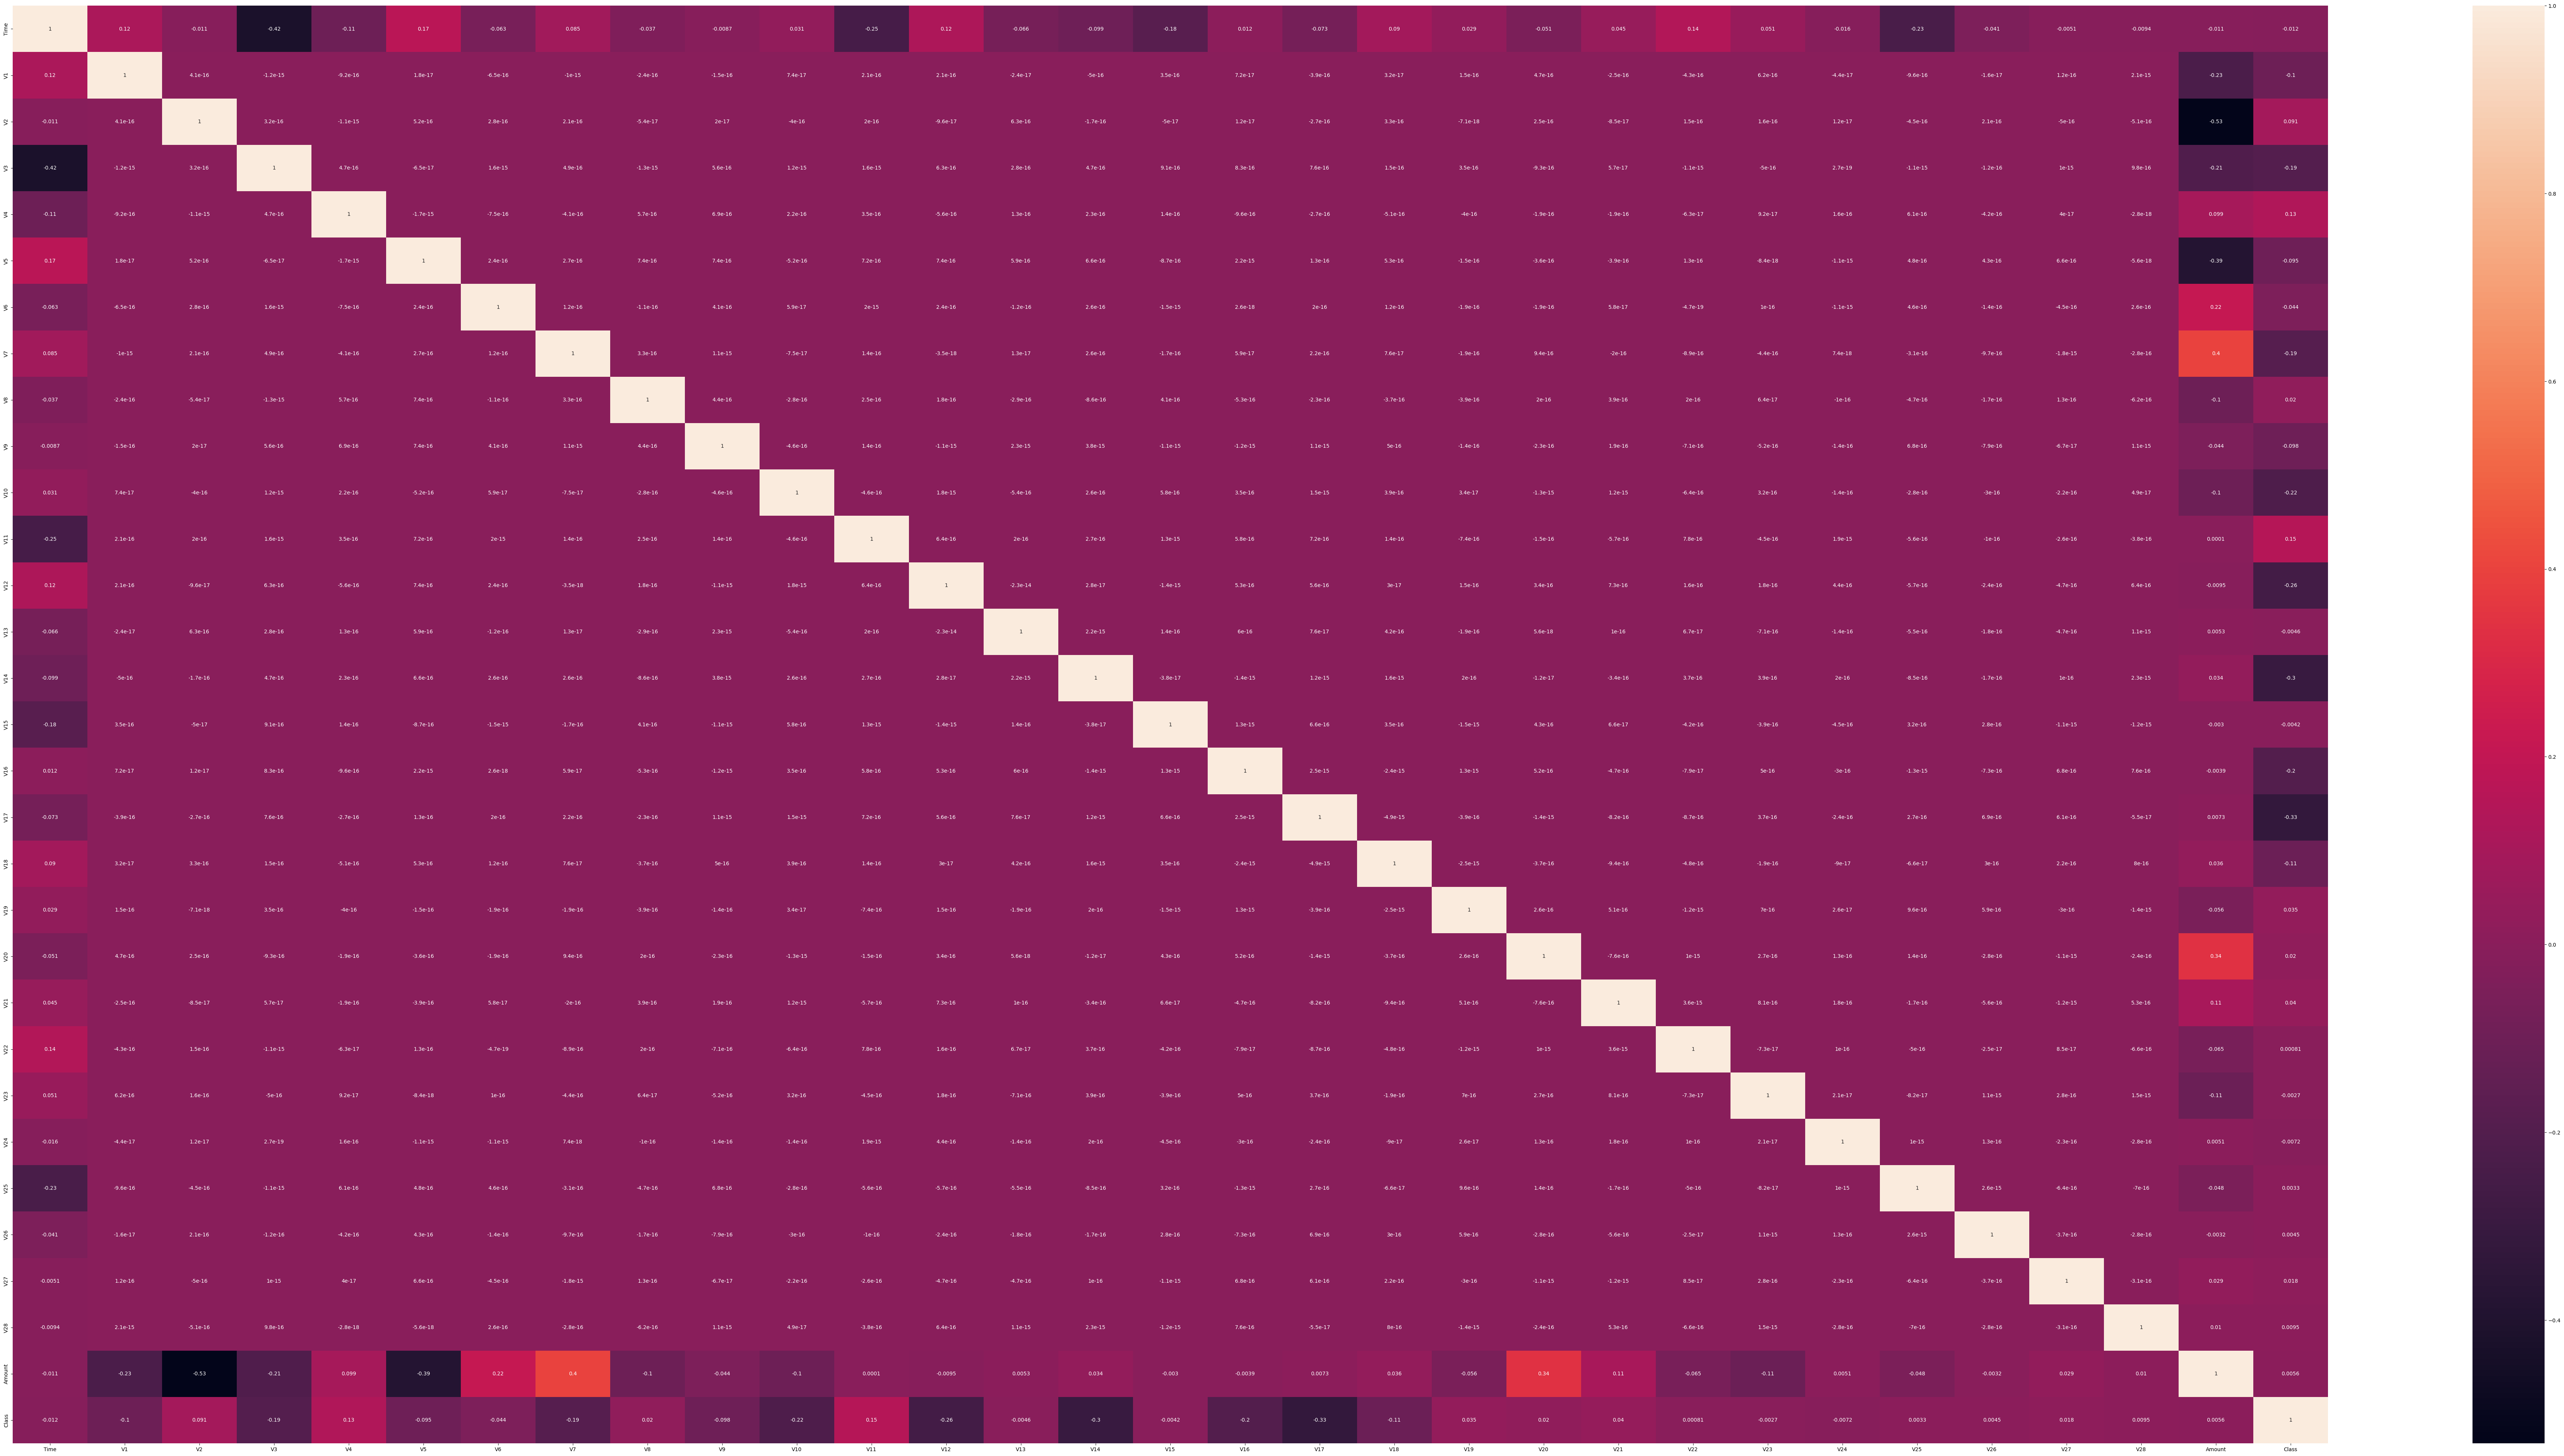

In [11]:
plt.figure(figsize=(100,50))
ax = sns.heatmap(credit_data.corr(), annot=True)

#Before Under Sampling

<Axes: xlabel='Class', ylabel='count'>

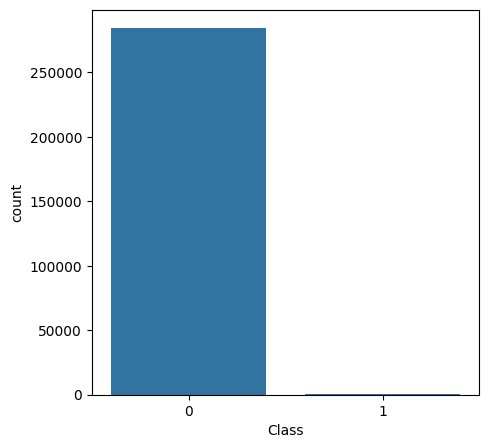

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(x='Class',data=credit_data)

UNDERSAMPLING

In [12]:
legit_sample=legit.sample(n=492)

In [13]:
new_data=pd.concat([legit_sample,fraud],axis=0)
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
211426,138408.0,-0.792425,0.052692,1.471559,0.880907,0.511908,0.064571,0.506631,-0.057296,0.177378,...,0.243418,0.758689,-0.075412,-0.682748,0.109165,-0.343472,0.221683,0.003124,111.00,0
70342,53831.0,-15.500430,-8.455736,-3.083537,4.561383,-1.440799,0.299797,1.682792,-0.747057,2.472405,...,-2.820998,0.063808,-0.181085,0.434030,0.752772,-0.497006,-4.421026,-0.500219,60.00,0
151038,94427.0,-0.785118,0.927495,2.026277,-0.134103,0.502613,0.237545,0.359100,0.195211,1.383966,...,0.023315,0.191343,-0.501100,0.344880,0.757324,-0.572395,0.023639,0.059072,1.00,0
273021,165382.0,1.914143,-1.406278,-0.387863,-0.821694,-1.457957,-0.483396,-1.132384,0.053283,-0.013053,...,0.509620,1.230993,0.065178,0.036866,-0.324541,-0.093106,-0.008443,-0.039327,109.00,0
197526,132061.0,2.009882,0.189255,-1.753710,0.567599,0.184426,-1.529760,0.339966,-0.426973,0.521924,...,0.209701,0.748488,-0.046970,-0.013900,0.257135,-0.107882,-0.002963,-0.023703,27.41,0


#After Under Sampling

<Axes: xlabel='Class', ylabel='count'>

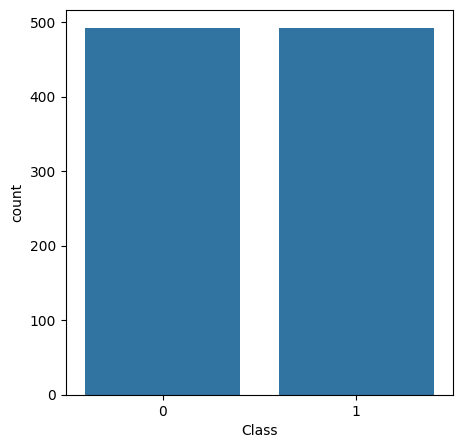

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x='Class',data=new_data)

In [14]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [15]:
X=new_data.drop(columns='Class',axis=1)
Y=new_data['Class']

In [16]:
print(X,Y)

            Time         V1        V2        V3        V4        V5        V6  \
211426  138408.0  -0.792425  0.052692  1.471559  0.880907  0.511908  0.064571   
70342    53831.0 -15.500430 -8.455736 -3.083537  4.561383 -1.440799  0.299797   
151038   94427.0  -0.785118  0.927495  2.026277 -0.134103  0.502613  0.237545   
273021  165382.0   1.914143 -1.406278 -0.387863 -0.821694 -1.457957 -0.483396   
197526  132061.0   2.009882  0.189255 -1.753710  0.567599  0.184426 -1.529760   
...          ...        ...       ...       ...       ...       ...       ...   
279863  169142.0  -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0   1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0  -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0  -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0   1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8 

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [18]:
model=LogisticRegression()
model.fit(X_train,Y_train)
training_prediction=model.predict(X_train)

In [19]:
training_accuracy=accuracy_score(training_prediction,Y_train)
print(training_accuracy)
test_prediction=model.predict(X_test)
test_accuracy=accuracy_score(test_prediction,Y_test)
print(test_accuracy)

0.9186785260482846
0.9137055837563451


In [39]:
from re import IGNORECASE
import warnings
warnings.filterwarnings('ignore')
X_new=X_test.iloc[0]
X_new=X_new.values.reshape(1,-1)
prediction=model.predict(X_new)
print(X_new)
print(prediction)
if(prediction[0]==0):
  print('The transaction is legit')
else:
  print('The transaction is fraud')

[[ 1.53761000e+05  1.14625927e+00  1.40345824e+00 -4.15914819e+00
   2.66010706e+00 -3.23216827e-01 -1.83607089e+00 -1.62374006e+00
   2.59562498e-01 -1.13204415e+00 -3.35647371e+00  3.64647784e+00
  -3.00268416e+00 -6.47500580e-01 -5.94500331e+00  1.74650037e-01
  -1.47563951e+00 -3.08227353e+00  2.24739755e-01 -3.00930779e-01
   2.84830656e-01  5.64449516e-01  4.45743912e-01 -1.41136197e-01
  -2.65517116e-01  3.62259920e-01 -4.16062098e-01  5.07369853e-01
   2.43744114e-01  5.13700000e+01]]
[1]
The transaction is fraud
